In [1]:
import os
os.chdir("/Users/Bya/git/predictEPL/MyFunctions/")
from dataIO import GetFilenames, csv_dic_df
from converter import toSeconds
import pandas as pd
import csv

# PLOT

In [2]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
dic_results = {
3:"""
1-0	(17)NAISMITH STEVEN
2-0	(22)NAISMITH STEVEN
2-1	MATIC NEMANJA(36)
3-1	(82)NAISMITH STEVEN
""",
    
1:"""
1-0	(31)WALCOTT THEO
2-0	(85)GIROUD OLIVIER
""",

2:"""
0-0	No Scores
0-1	IHEANACHO KELECHI(90)
""",

5:"""
1-0	(35)JEROME CAMERON
2-0	(52)HOOLAHAN WES
3-0	(67)JARVIS MATTHEW
3-1	COOK STEVE(81)
""",
    
8:"""
0-0	No Scores
1-0	(59)IGHALO ODION
""",
9: """
0-0
0-0
""",
    
7:"""
0-0	No Scores
1-0	(49)BLIND DALEY
2-0	(Pen70)HERRERA ANDER
2-1	BENTEKE CHRISTIAN(84)
3-1	(86)MARTIAL ANTHONY
""",

6:"""
0-0	No Scores
0-1	MASON RYAN(82)
""",
    
4:"""
0-1	GREALISH JACK(39)
0-2	GIL CARLES(63)
1-2	(72)DE LAET RITCHIE
2-2	(82)VARDY JAMIE
3-2	(89)DYER NATHAN
""",
    
10 :
"""
1-0	(9)PAYET DIMITRI
2-0	(48)PAYET DIMITRI
"""
    }

# Sentiment Plot

In [4]:
def plot_noncum_cum_sentiment(dic_minutes_home_pos, dic_minutes_home_neg,
                              dic_minutes_away_pos, dic_minutes_away_neg, limit=True):

    plt.figure(figsize=(15, 13))


    tweets_home_pos = tuple(list(dic_minutes_home_pos.values()))
    tweets_home_neg = tuple(list(dic_minutes_home_neg.values()))

    ax = plt.subplot(2,2,1)
    if limit:
        ax.set_xlim([0, 60])

    plot1 = plt.plot(tweets_home_pos, label='pos', alpha=0.5, color='green')
    plot2 = plt.plot(tweets_home_neg, label='neg', alpha=0.5, color='red')



    plt.xlabel('Minutes')
    plt.ylabel('Number of Tweets')
    plt.title('Sum of Sentiment Tweets Score by Minutes: ' + home_team)
    plt.legend()
    plt.tight_layout()



    tweets_away_pos = tuple(list(dic_minutes_away_pos.values()))
    tweets_away_neg = tuple(list(dic_minutes_away_neg.values()))

    ax = plt.subplot(2,2,2)
    ax.set_xlim([0, 60])
    
    plot1 = plt.plot(tweets_away_pos, label='pos', alpha=0.5, color='green')
    plot2 = plt.plot(tweets_away_neg, label='neg', alpha=0.5, color='red')



    plt.xlabel('Minutes')
    plt.ylabel('Number of Tweets')
    plt.title('Sum of Sentiment Tweets Score by Minutes (Cumulative): ' + awaya_team)
    plt.legend()
    plt.tight_layout()


    plt.show()

In [5]:
def create_minute_dics_sentiment_sum(df):
    minutes = range(120)
    dic_minutes_home_pos = {}
    dic_minutes_home_neg = {}
    dic_minutes_away_pos = {}
    dic_minutes_away_neg = {}

    for minute in minutes:
        # home
        try:
            dic_minutes_home_pos[minute] = sum(df[(df['side'] == 'home') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)]['short_pos'])
        except:
            dic_minutes_home_pos[minute] = 0
        
        try:
            dic_minutes_home_neg[minute] = sum(df[(df['side'] == 'home') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)]['short_neg'])
        except:
            dic_minutes_home_neg[minute] = 0
        
        # away
        try:
            dic_minutes_away_pos[minute] = sum(df[(df['side'] == 'away') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)]['short_pos'])
        except:
            dic_minutes_away_pos[minute] = 0
        
        try:
            dic_minutes_away_neg[minute] = sum(df[(df['side'] == 'away') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)]['short_neg'])
        except:
            dic_minutes_away_neg[minute] = 0

        
    return (dic_minutes_home_pos, dic_minutes_home_neg,
            dic_minutes_away_pos, dic_minutes_away_neg)

GW5 Arsenal Stoke

1-0	(31)WALCOTT THEO
2-0	(85)GIROUD OLIVIER

Arsenal: 0.434166007496 	Stoke: 0.396727955831


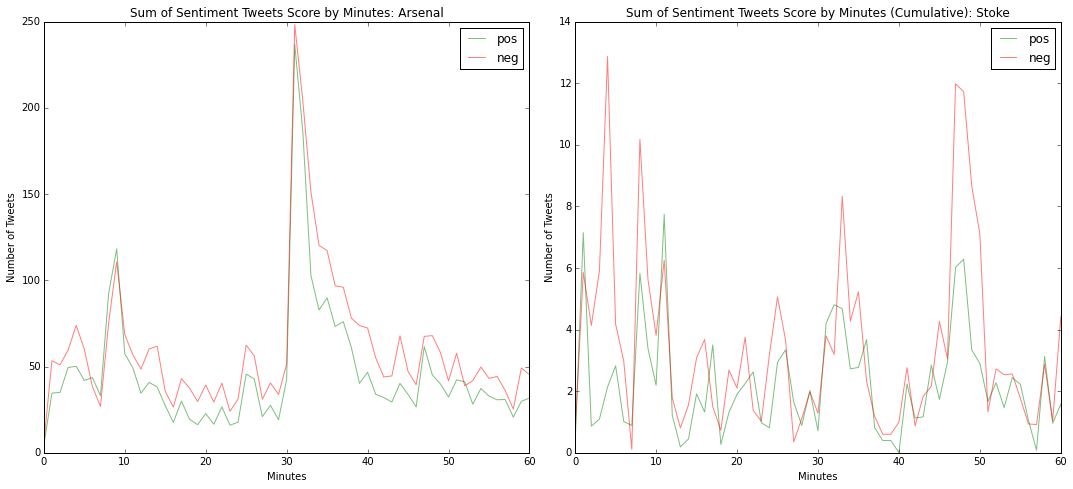

GW5 Crystal City

0-0	No Scores
0-1	IHEANACHO KELECHI(90)

Crystal: 0.522904089354 	City: 0.517071044997


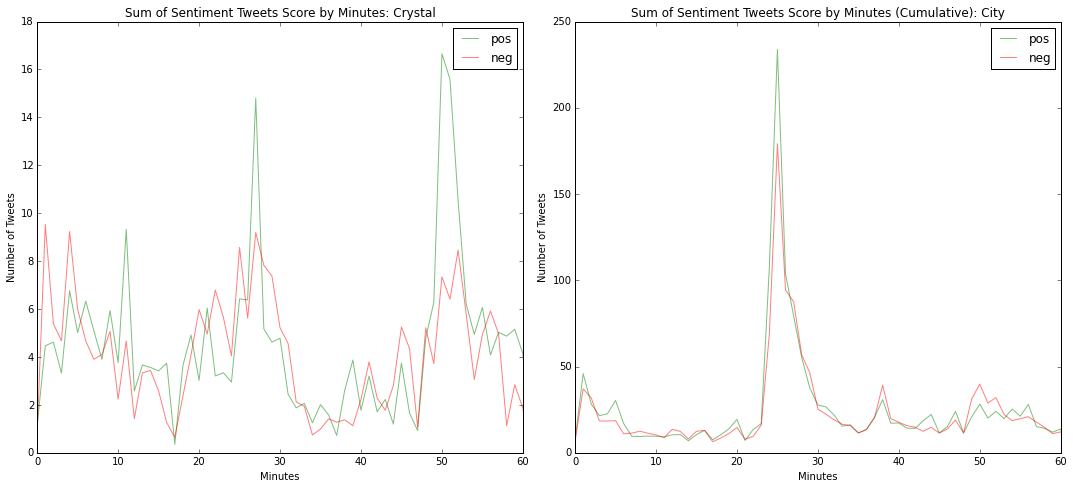

GW5 Everton Chelsea

1-0	(17)NAISMITH STEVEN
2-0	(22)NAISMITH STEVEN
2-1	MATIC NEMANJA(36)
3-1	(82)NAISMITH STEVEN

Everton: 0.457023432194 	Chelsea: 0.42463685193


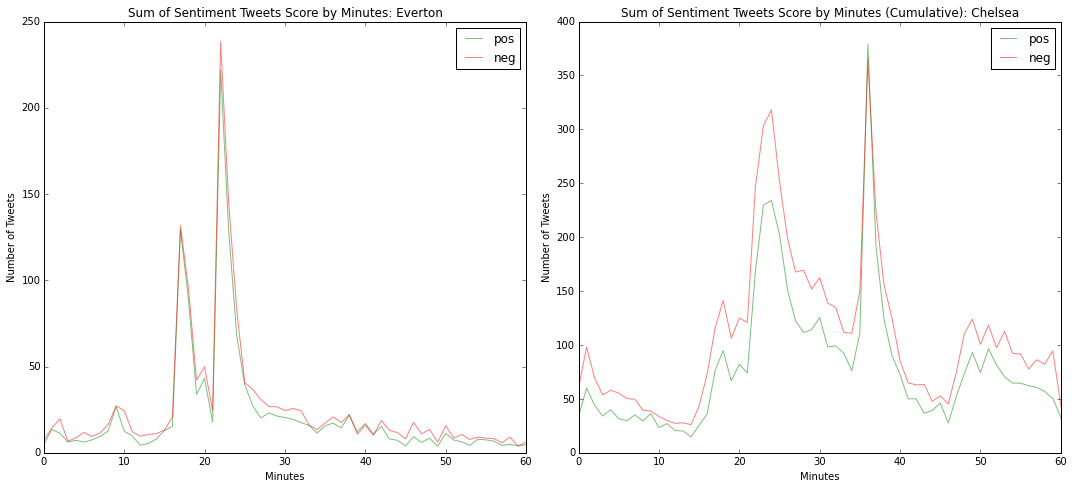

GW5 Leicester Villa

0-1	GREALISH JACK(39)
0-2	GIL CARLES(63)
1-2	(72)DE LAET RITCHIE
2-2	(82)VARDY JAMIE
3-2	(89)DYER NATHAN

Leicester: 0.441753628948 	Villa: 0.524486476995


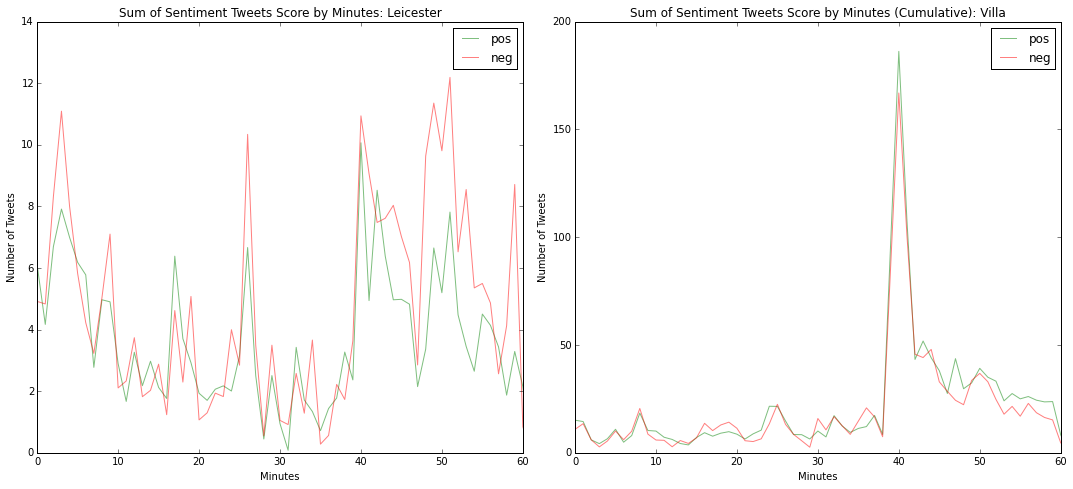

GW5 Norwich Bournemouth

1-0	(35)JEROME CAMERON
2-0	(52)HOOLAHAN WES
3-0	(67)JARVIS MATTHEW
3-1	COOK STEVE(81)

Norwich: 0.496061685226 	Bournemouth: 0.510762033637


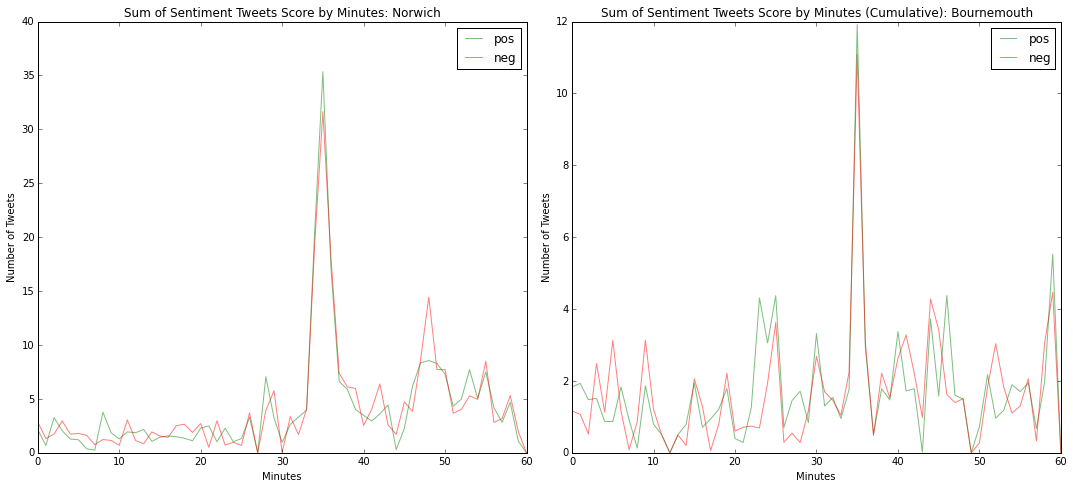

GW5 Sunderland Tottenham

0-0	No Scores
0-1	MASON RYAN(82)

Sunderland: 0.485987873113 	Tottenham: 0.495656661666


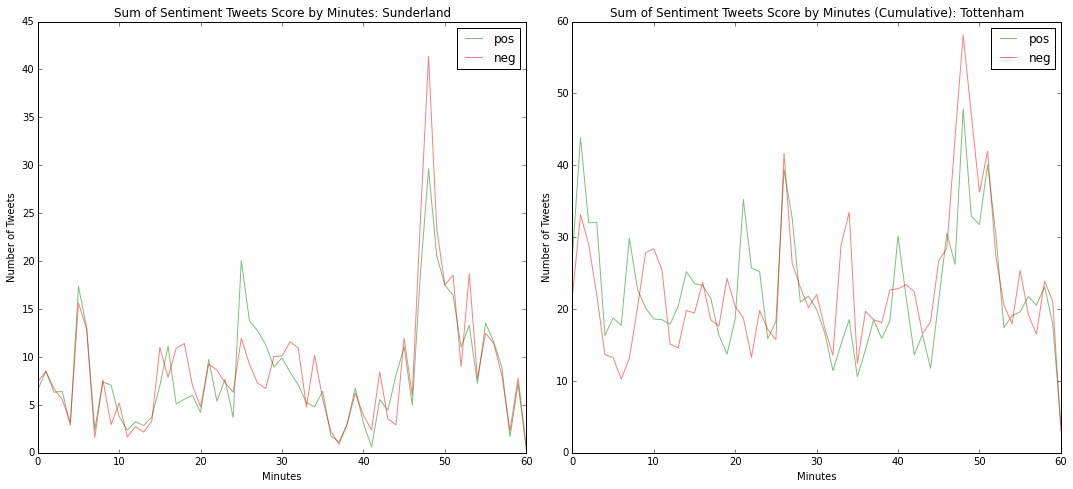

GW5 United Liverpool

0-0	No Scores
1-0	(49)BLIND DALEY
2-0	(Pen70)HERRERA ANDER
2-1	BENTEKE CHRISTIAN(84)
3-1	(86)MARTIAL ANTHONY

United: 0.471840438024 	Liverpool: 0.445621036138


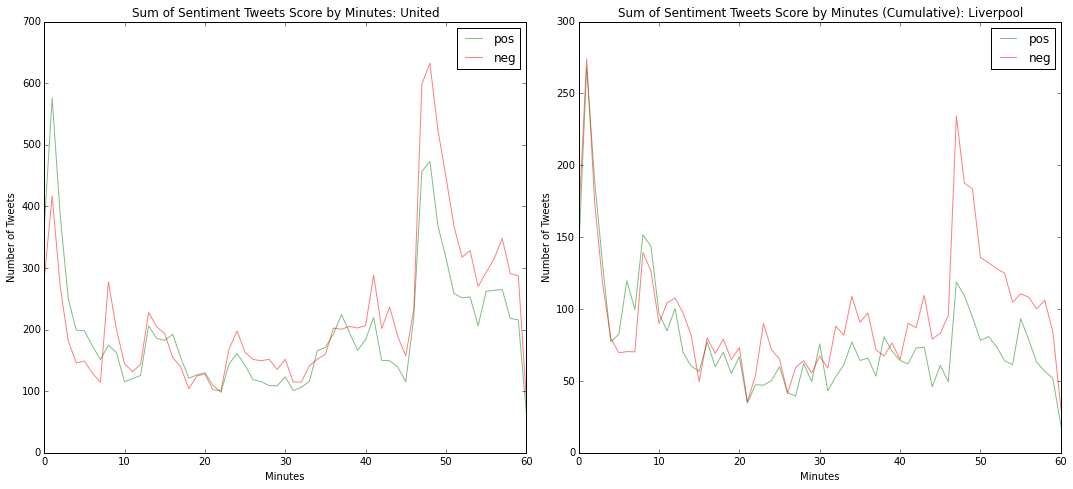

GW5 Watford Swansea

0-0	No Scores
1-0	(59)IGHALO ODION

Watford: 0.454594451784 	Swansea: 0.512104875956


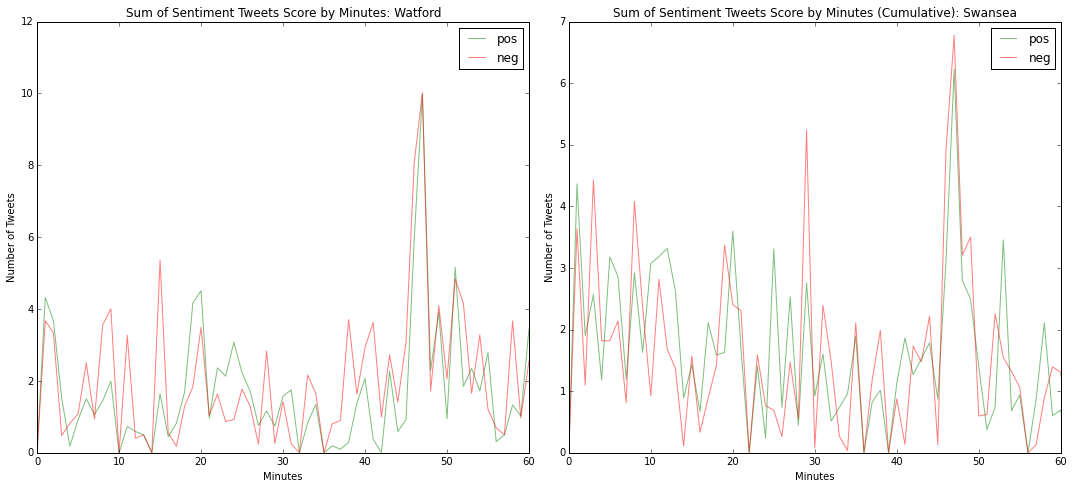

GW5 WestBromwich Southampton

0-0
0-0

WestBromwich: 0.446051694133 	Southampton: 0.430690584301


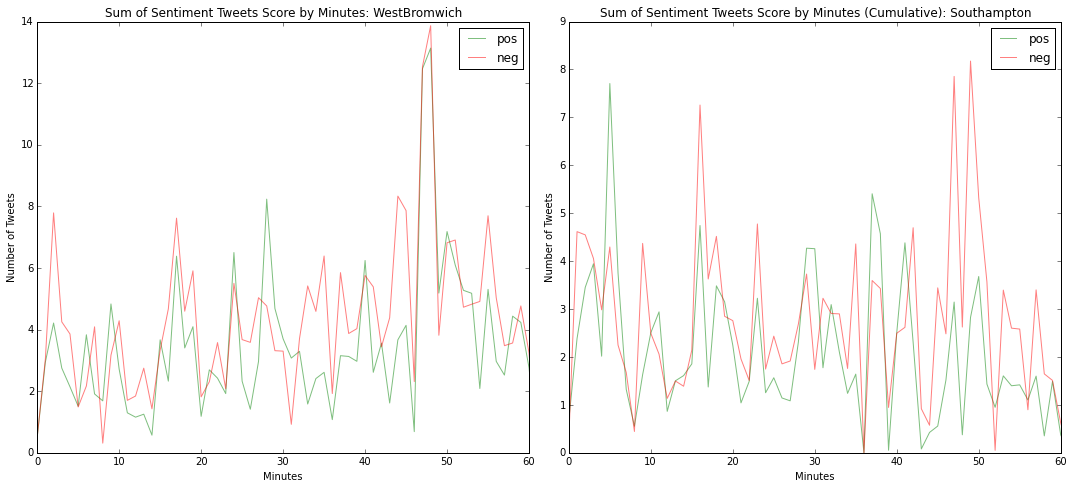

GW5 WestHam Newcastle

1-0	(9)PAYET DIMITRI
2-0	(48)PAYET DIMITRI

WestHam: 0.387788127204 	Newcastle: 0.385210146915


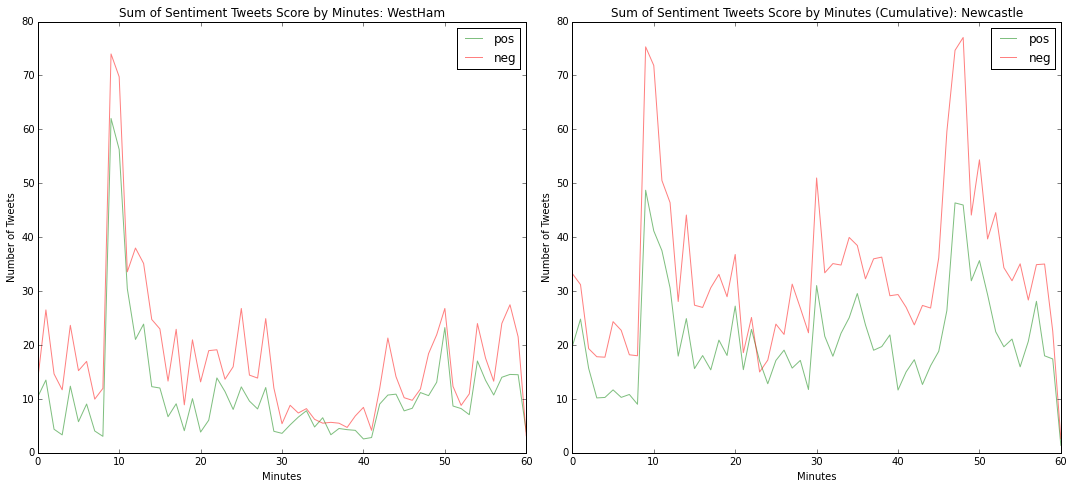

In [6]:
os.chdir('/Users/Bya/Dropbox/Research/datas/Results/NB_Short_Long/')
filenames = GetFilenames('GW' + str(5))
key = 1

for filePath in filenames:
# filePath = filenames[0]
    GW = filePath.split('/')[0]
    home_team = filePath[:-4].split('/')[1].split('_')[0]
    awaya_team = filePath[:-4].split('/')[1].split('_')[2]
    print(GW, home_team, awaya_team)
    print(dic_results[key])
    key += 1


    # read csv as df
    df = csv_dic_df(filePath)
    df['ith_minute'] = [float(ith_minute) for ith_minute in df['ith_minute']]
    df['short_pos'] = [float(ith_minute) for ith_minute in df['short_pos']]
    df['short_neg'] = [float(ith_minute) for ith_minute in df['short_neg']]
    df['long_pos'] = [float(ith_minute) for ith_minute in df['long_pos']]
    df['long_neg'] = [float(ith_minute) for ith_minute in df['long_neg']]



    # dics
    x,y,a,b = create_minute_dics_sentiment_sum(df)

    # sentiment %
    sum_home_pos = sum(list(x.values()))
    sum_home_neg = sum(list(y.values()))

    home_pos = sum_home_pos / (sum_home_pos + sum_home_neg)

    sum_away_pos = sum(list(a.values()))
    sum_away_neg = sum(list(b.values()))

    away_pos = sum_away_pos / (sum_away_pos + sum_away_neg)

    print("%s: %s \t%s: %s" %(home_team, home_pos, awaya_team, away_pos))

    # plot
    plot_noncum_cum_sentiment(x,y,a,b)